In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import matlab.engine as mtl

ModuleNotFoundError: No module named 'matlab'

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
tf.debugging.set_log_device_placement(True)
# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [3]:
new_var = tf.sqrt(1.2)
new_var2 = tf.math.pow(1.2, 4)
tf.math.cos(10.)
tf.math.sin(10.)
a = tf.cast([1, 2, 3, 4, 5, 6], tf.complex128)
print(tf.reduce_sum(tf.math.pow(tf.math.abs(a), 2)))

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sqrt in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pow in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cos in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sin in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ComplexAbs in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pow in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executi

In [7]:
tf.debugging.set_log_device_placement(True)
d = tf.matmul(c, c)
print(d)

tf.Tensor(
[[1856. 2408.]
 [4214. 5468.]], shape=(2, 2), dtype=float32)


In [14]:
from datetime import datetime
start_time = datetime.now()
x = 0

for i in range(1000):
   x += i

end_time = datetime.now()
time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print(execution_time)

0.16799999999999998


In [38]:
# tf.debugging.set_log_device_placement(False)

In [16]:
# tf.debugging.set_log_device_placement(False)

start_time = datetime.now()

for i in range(100):
    spectrum = tf.signal.fft(signal)
    signal_restored = tf.signal.ifft(spectrum)

end_time = datetime.now()
time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print(execution_time)

173.456


In [15]:
start_time = datetime.now()

for i in range(100):
    spectrum_sp = fft(signal)
    signal_restored = ifft(spectrum_sp)

end_time = datetime.now()
time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print(execution_time)

10.193000000000001


In [11]:
def tf_ssfm_manakov_dispersive_step(first, second, dispersion):

    first_new = tf.signal.ifft(tf.signal.fft(first) * dispersion)
    second_new = tf.signal.ifft(tf.signal.fft(second) * dispersion)
    return first_new, second_new

def tf_ssfm_manakov_nonlinear_step(first, second, gamma, delta_z):

    abs_first = tf.cast(tf.math.abs(first), tf.complex128)
    abs_second = tf.cast(tf.math.abs(second), tf.complex128)
    first_new = first * tf.math.exp(tf.cast(1.0j * delta_z * 8.0 / 9.0 * gamma, tf.complex128) * (abs_first * abs_first + abs_second * abs_second))
    second_new = second * tf.math.exp(tf.cast(1.0j * delta_z * 8.0 / 9.0 * gamma, tf.complex128) * (abs_first * abs_first + abs_second * abs_second))
    return first_new, second_new

def tf_manakov_fiber_propogate(initial_first, initial_second, t_span, fiber_length, n_span, gamma, beta2, alpha=0, beta3=0):

    if abs(fiber_length) < 1e-15:
        return initial_first, initial_second

    dz = fiber_length / n_span
    print(dz)

    if len(initial_first) != len(initial_second):
        print('[tf_manakov_fiber_propogate] Error: sizes of first and second polarisation have to be the same!')
        return initial_first, initial_second

    n = len(initial_first)
    w = tf.signal.fftshift(np.array([(i - n / 2) * (2. * np.pi / t_span) for i in range(n)], dtype=np.complex))
    w2 = tf.math.pow(w, 2)
    w3 = tf.math.pow(w, 3)
    # dispersion = tf.dtypes.complex(0.0, 0.5) * tf.dtypes.complex(beta2, 0.0) * w2
    # dispersion = tf.math.exp(0.5j * beta2 * tf.math.pow(w, 2))
    dispersion = tf.math.exp((0.5j * beta2 * w2 + 1. / 6. * beta3 * w3 - alpha / 2.) * dz)
    dispersion_half = tf.math.exp((0.5j * beta2 * w2 + 1. / 6. * beta3 * w3 - alpha / 2.) * dz / 2.)
    dispersion_mhalf = tf.math.exp((0.5j * beta2 * w2 + 1. / 6. * beta3 * w3 - alpha / 2.) * -dz / 2.)

    # D/2
    first, second = tf_ssfm_manakov_dispersive_step(initial_first, initial_second, dispersion_half)

    for n in range(n_span):
        first, second = tf_ssfm_manakov_nonlinear_step(first, second, gamma, dz)
        first, second = tf_ssfm_manakov_dispersive_step(first, second, dispersion)
        # ...

    # -D/2
    first, second = tf_ssfm_manakov_dispersive_step(first, second, dispersion_mhalf)

    return first, second

In [12]:
def tf_ssfm_dispersive_step(signal, dispersion):

    return tf.signal.ifft(tf.signal.fft(signal) * dispersion)


def tf_ssfm_nonlinear_step(signal, gamma, delta_z):

    # signal * np.exp(1.0j * delta_z * gamma * np.power(np.absolute(signal), 2))

    # return signal * tf.math.exp(tf.dtypes.complex(0.0, delta_z * gamma) * tf.math.abs(signal) * tf.math.abs(signal))
    # return tf.math.exp(tf.dtypes.complex(0.0, delta_z * gamma) * tf.math.abs(signal) * tf.math.abs(signal))
    abs_signal = tf.cast(tf.math.abs(signal), tf.complex128)
    return signal * tf.math.exp(tf.cast(1.0j * delta_z * gamma, tf.complex128) * abs_signal * abs_signal)


def tf_fiber_propogate(initial_signal, t_span, fiber_length, n_span, gamma, beta2, alpha=0, beta3=0):

    if abs(fiber_length) < 1e-15:
        return initial_signal

    dz = fiber_length / n_span

    n = len(initial_signal)
    w = tf.signal.fftshift(np.array([(i - n / 2) * (2. * np.pi / t_span) for i in range(n)], dtype=np.complex))
    w2 = tf.math.pow(w, 2)
    w3 = tf.math.pow(w, 3)
    # dispersion = tf.dtypes.complex(0.0, 0.5) * tf.dtypes.complex(beta2, 0.0) * w2
    # dispersion = tf.math.exp(0.5j * beta2 * tf.math.pow(w, 2))
    dispersion = tf.math.exp((0.5j * beta2 * w2 + 1. / 6. * beta3 * w3 - alpha / 2.) * dz)
    dispersion_half = tf.math.exp((0.5j * beta2 * w2 + 1. / 6. * beta3 * w3 - alpha / 2.) * dz / 2.)
    dispersion_mhalf = tf.math.exp((0.5j * beta2 * w2 + 1. / 6. * beta3 * w3 - alpha / 2.) * -dz / 2.)

    # D/2
    signal = tf_ssfm_dispersive_step(initial_signal, dispersion_half)

    for n in range(n_span):
        signal = tf_ssfm_nonlinear_step(signal, gamma, dz)
        signal = tf_ssfm_dispersive_step(signal, dispersion)
        # ...

    # -D/2
    signal = tf_ssfm_dispersive_step(signal, dispersion_mhalf)

    return signal

In [18]:
signal_tf = tf.cast(signal, tf.complex128)
print(len(signal_tf))

128


In [ ]:
import ssfm

distance = 1.0
np_z = 2 ** 2

start_time = datetime.now()
t_span = t_vector[-1] - t_vector[0]
s_prop_slow = ssfm.fiber_propogate(signal, t_span, distance, np_z, 1.0, -1.0, alpha=0, beta3=0)
s_back_slow = ssfm.fiber_propogate(s_prop_slow, t_span, -distance, np_z, 1.0, -1.0, alpha=0, beta3=0)
s_prop_fast = tf_fiber_propogate(signal_tf, t_span, distance, np_z, 1.0, -1.0, alpha=0, beta3=0)
s_back_fast = tf_fiber_propogate(s_prop_fast, t_span, -distance, np_z, 1.0, -1.0, alpha=0, beta3=0)
end_time = datetime.now()
time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print(execution_time)

2022-05-27 12:26:51.413436: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10


In [55]:
distance = 1.0
np_z = 2 ** 12

beta2 =

t_span = t_vector[-1] - t_vector[0]
start_time = datetime.now()
s_prop_fast_first, s_prop_fast_second = tf_manakov_fiber_propogate(signal_tf, signal_tf, t_span, distance, np_z, 1.0, -1.0, alpha=0, beta3=0)
s_back_fast_first, s_back_fast_second = tf_manakov_fiber_propogate(s_prop_fast_first, s_prop_fast_second, t_span, -distance, np_z, 1.0, -1.0, alpha=0, beta3=0)
end_time = datetime.now()
time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print(execution_time)

6.103515625e-05
-6.103515625e-05
122324.393


In [28]:
print(np.shape(signal_tf), np.shape(s_prop_fast_first), np.shape(s_prop_fast_second), np.shape(s_back_fast_first), np.shape(s_back_fast_second))

(18432,) (18432,) (18432,) (18432,) (18432,)


In [16]:
tf.math.exp(-0-0.5j)

<tf.Tensor: shape=(), dtype=complex128, numpy=(0.8775825618903728-0.479425538604203j)>

Executing op IFFT in device /job:localhost/replica:0/task:0/device:GPU:0


In [9]:
from scipy.fft import fft, ifft

In [11]:
spectrum_sp = fft(signal)

In [17]:
import signal_generation as sg
import numpy as np
# create signal

mod_type = "16qam"
n_car = 1
t_symb = 1.0
n_symb = 4
dt = t_symb / n_symb
num_symbols = 2 ** 5
n_lateral = 0 * n_symb
# p_ave = 0.74
p_ave = 0.05
roll_off = 0.01
data = sg.gen_wdm_bit_sequence(num_symbols, mod_type, n_car)
points = sg.get_constellation_point(data, mod_type)
signal = sg.get_wdm_signal(data, t_symb=t_symb, n_symb=n_symb,
                           func=sg.srrcos, func_args=[t_symb, roll_off],
                           n_carriers=n_car, mod_type=mod_type, n_lateral=n_lateral)

np_signal = len(signal)
t_vector = np.array([(i - np_signal / 2) * dt for i in range(np_signal)])

In [23]:
t_vector = np.array([(i - np_signal / 2) * dt for i in range(np_signal)])
print(np.shape(t_vector))

(18432,)


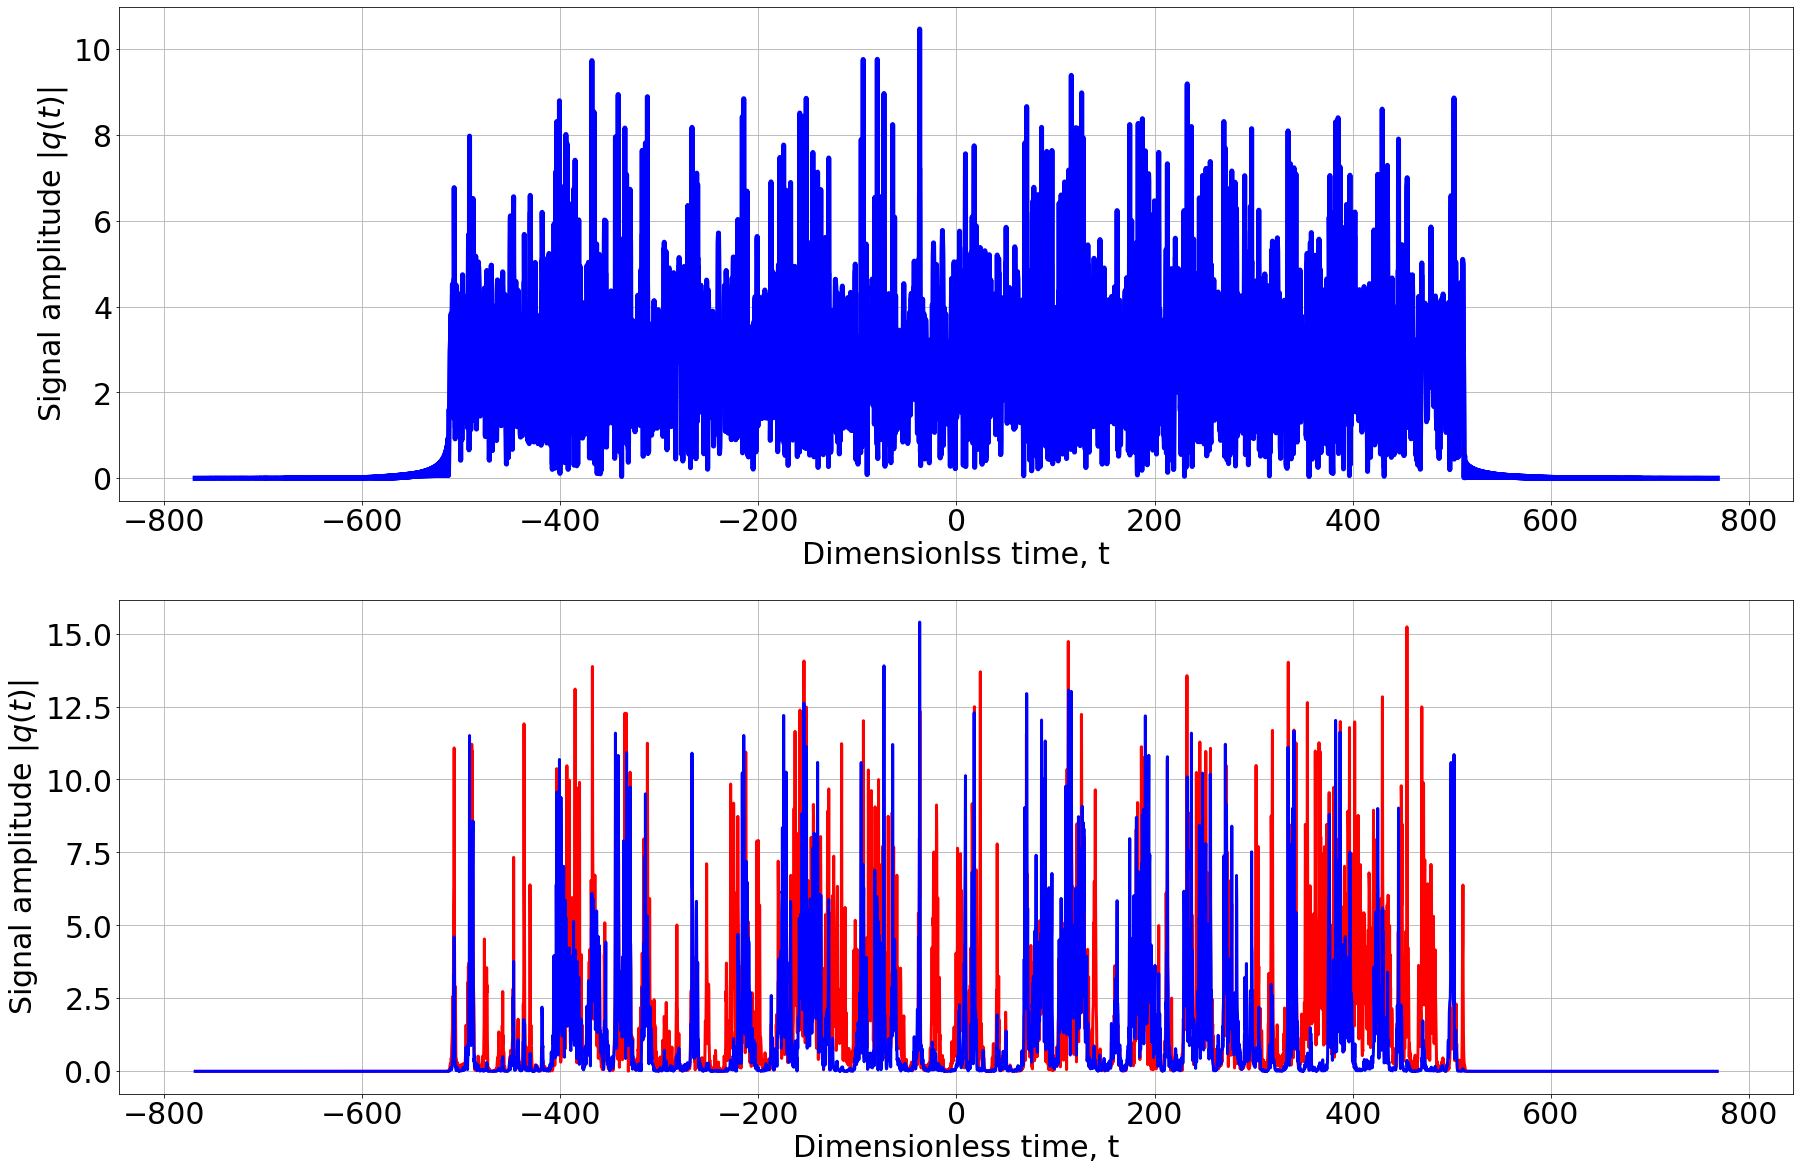

In [93]:
matplotlib.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(2, 1, figsize=(30, 20))
axs[0].plot(t_vector, np.absolute(signal), color='blue', linewidth=5.0)
axs[0].plot(t_vector, np.absolute(s_back_slow), color='blue', linewidth=5.0)
# axs[0].plot(t_vector, np.absolute(s_prop_slow), color='blue', linewidth=5.0)
# axs[0].plot(t_vector, np.absolute(s_prop_fast), color='red', linewidth=5.0)
# axs[0].set_xlim(-10, 10)
axs[0].set_xlabel('Dimensionlss time, t')
axs[0].set_ylabel('Signal amplitude $|q(t)|$')
axs[0].grid(True)

# axs[1].plot(np.absolute(spectrum), color='blue', linewidth=5.0)
# axs[1].plot(t_vector, np.absolute(s_prop_slow - s_prop_fast), color='red', linewidth=3.0)
axs[1].plot(t_vector, np.absolute(signal_tf - s_back_fast), color='red', linewidth=3.0)
axs[1].plot(t_vector, np.absolute(signal - s_back_slow), color='blue', linewidth=3.0)
# axs[1].set_xlim(-20, 20)
axs[1].set_xlabel('Dimensionless time, t')
axs[1].set_ylabel('Signal amplitude $|q(t)|$')
# axs[1].set_yscale('log')
axs[1].grid(True)

In [26]:
print(np.shape(s_back_fast_first), np.shape(s_prop_fast_first))

(10240,) (10240,)


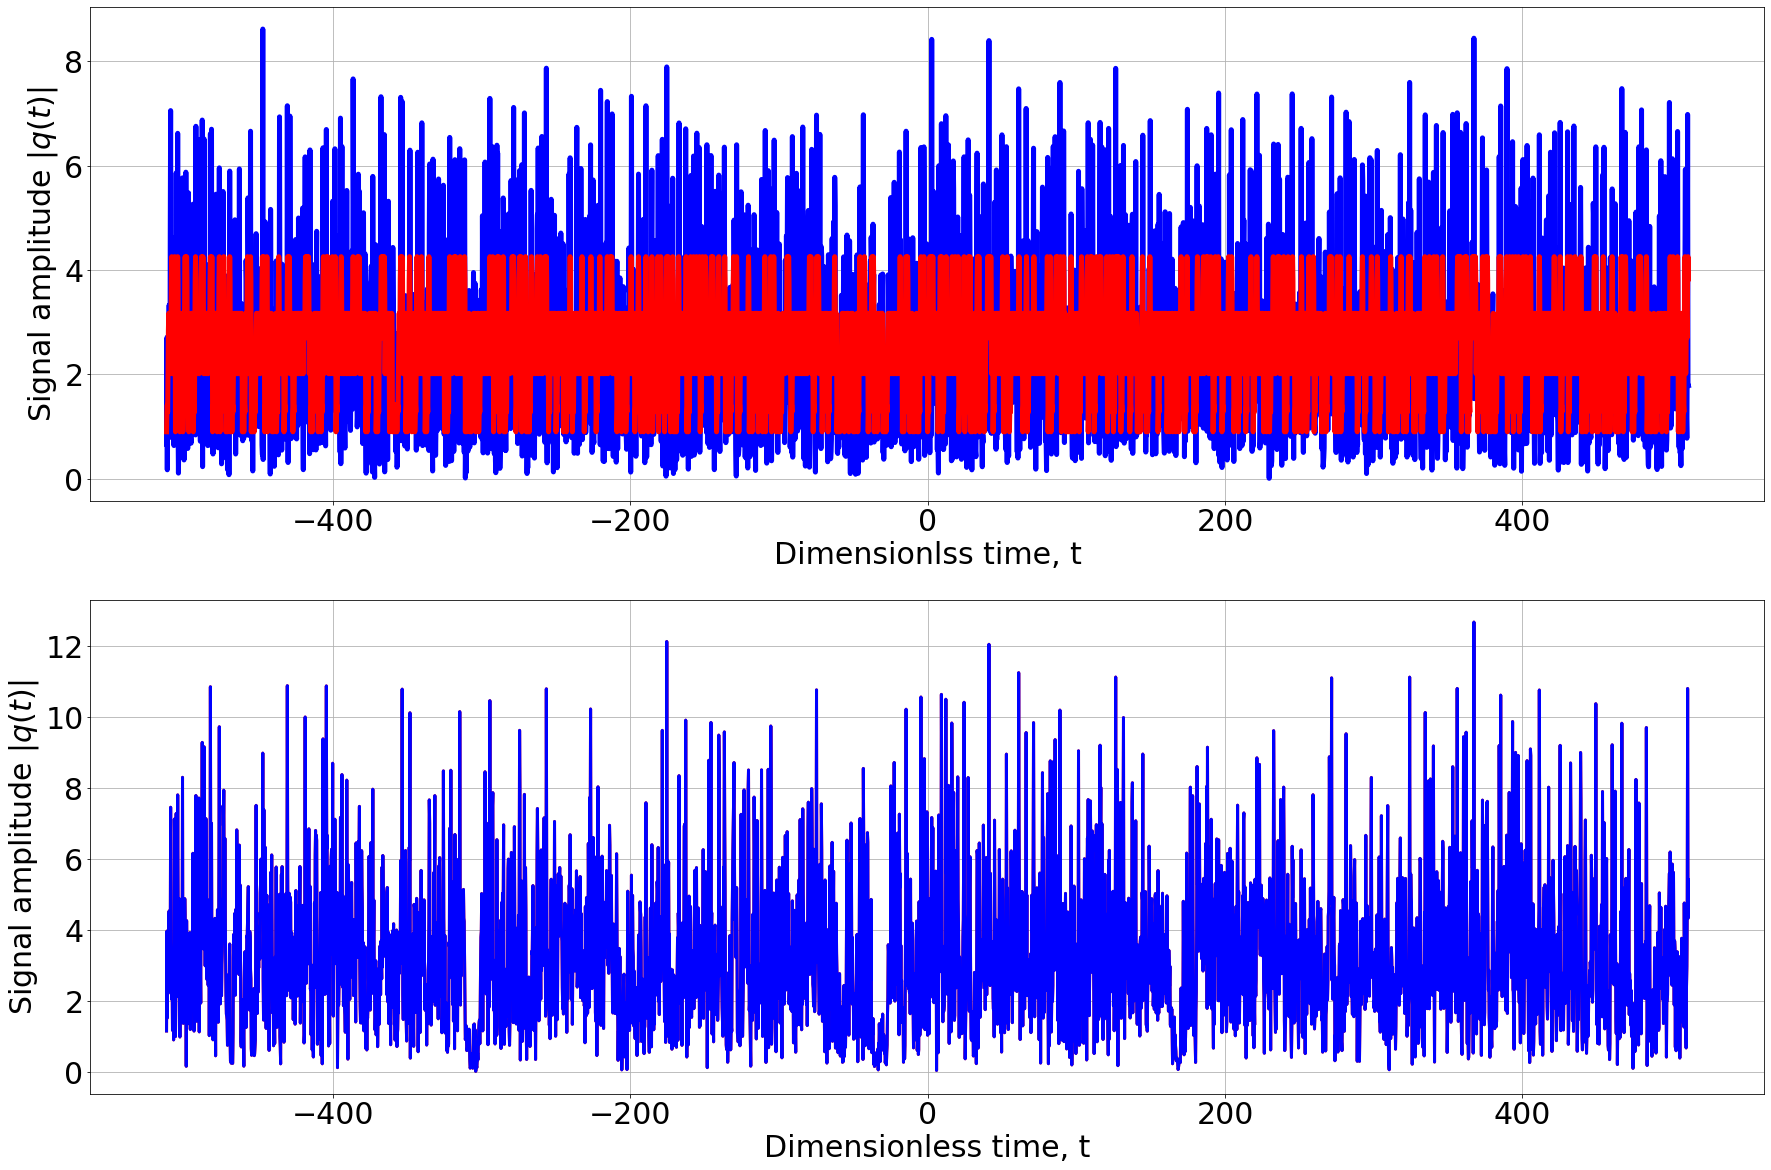

In [56]:
matplotlib.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(2, 1, figsize=(30, 20))
axs[0].plot(t_vector, np.absolute(s_back_fast_first), color='blue', linewidth=5.0)
axs[0].plot(t_vector, np.absolute(signal_tf), color='red', linewidth=5.0)
# axs[0].plot(t_vector, np.absolute(s_prop_slow), color='blue', linewidth=5.0)
# axs[0].plot(t_vector, np.absolute(s_prop_fast), color='red', linewidth=5.0)
# axs[0].set_xlim(-10, 10)
axs[0].set_xlabel('Dimensionlss time, t')
axs[0].set_ylabel('Signal amplitude $|q(t)|$')
axs[0].grid(True)

# axs[1].plot(np.absolute(spectrum), color='blue', linewidth=5.0)
# axs[1].plot(t_vector, np.absolute(s_prop_slow - s_prop_fast), color='red', linewidth=3.0)
axs[1].plot(t_vector, np.absolute(signal_tf - s_back_fast_first), color='red', linewidth=3.0)
axs[1].plot(t_vector, np.absolute(signal_tf - s_back_fast_second), color='blue', linewidth=3.0)
# axs[1].set_xlim(-20, 20)
axs[1].set_xlabel('Dimensionless time, t')
axs[1].set_ylabel('Signal amplitude $|q(t)|$')
# axs[1].set_yscale('log')
axs[1].grid(True)

In [1]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
print(a[::2])

[1, 3, 5, 7]


In [3]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np
from commpy.modulation import QAMModem
from commpy.filters import rrcosfilter
from scipy.fft import fft, ifft, fftshift, ifftshift
N = 2 ** 0  # Number of symbols
os = 8 #over sampling factor
# Create modulation. QAM16 makes 4 bits/symbol
mod1 = QAMModem(16)
# Generate the bit stream for N symbols
sB = np.random.randint(0, 2, N*mod1.num_bits_symbol)
# Generate N complex-integer valued symbols
sQ = mod1.modulate(sB)
sQ_upsampled = np.zeros(os*(len(sQ)-1)+1,dtype = np.complex64)
sQ_upsampled[::os] = sQ
# Create a filter with limited bandwidth. Parameters:
#      N: Filter length in samples
#    0.8: Roll off factor alpha
#      1: Symbol period in time-units
#     24: Sample rate in 1/time-units
sPSF = rrcosfilter(len(sQ_upsampled), alpha=0.1, Ts=1, Fs=os)[1]
sPSF2 = rrcosfilter(256, alpha=0.1, Ts=1, Fs=os)[1]
print(len(sPSF), len(sQ_upsampled))
# Analog signal has N/2 leading and trailing near-zero samples
qW = np.convolve(sPSF2, sQ_upsampled)


q_other = ifft((fft(sQ_upsampled)) * (fft(sPSF)))

q_other1 = np.concatenate((q_other[int(len(q_other) / 2):], q_other[:int(len(q_other) / 2)]))

shift = int(len(sQ_upsampled) / 2)
qW1 = qW[shift:shift + len(q_other)]

print(np.shape(qW), np.shape(q_other))

1 1
(256,) (1,)


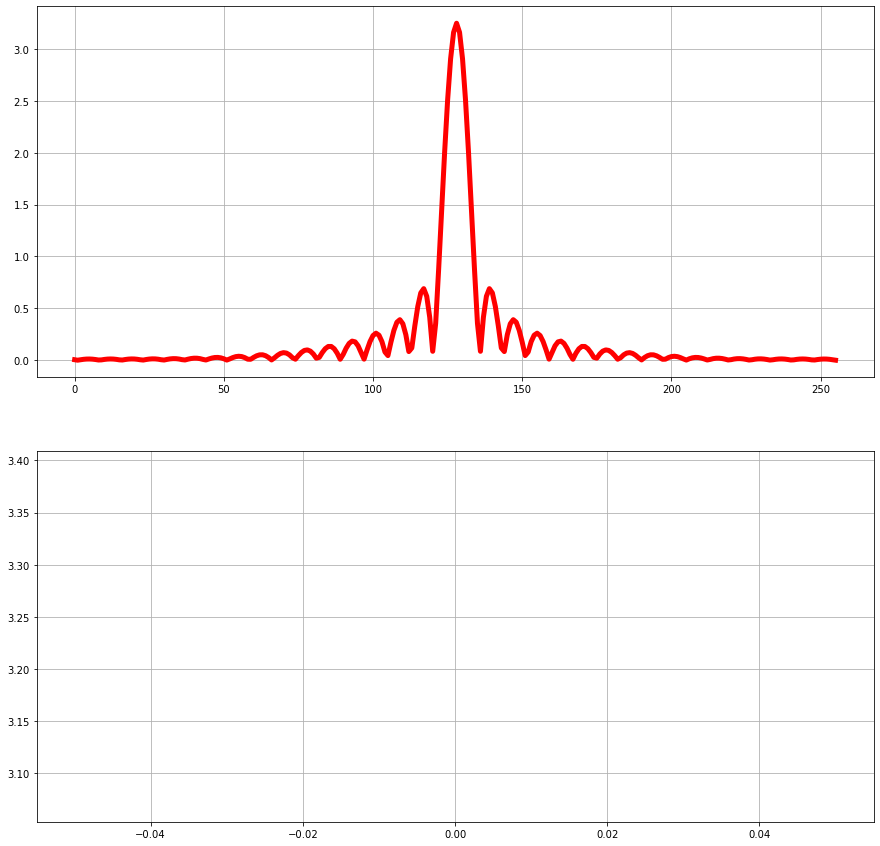

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
# axs[0][0].scatter(xx.real[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000),
#             xx.imag[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
axs[0].plot(np.absolute(qW), linewidth=5, color='red')
# axs[0].plot(np.absolute(q_other), linewidth=3, color='blue')
# axs[0].set_xlabel("Ix component Received")
# axs[0].set_ylabel("Qx component Received")
axs[0].grid(True)
# axs[0][0].set_xlim(0.9, 1.1)
# axs[0][0].set_ylim(0.9, 1.1)

# axs[0][1].scatter(yy.real[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000),
#             yy.imag[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
axs[1].plot(np.absolute(qW1 - q_other1), linewidth=3, color='blue')
# axs[1].scatter(points_y_orig.real[range_plot], points_y_orig.imag[range_plot], s=8, c='b', marker='x')
# axs[1].set_xlabel("Ix component Received")
# axs[1].set_ylabel("Qx component Received")
axs[1].grid(True)